Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  RandomizedSearchCV,train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold,  StratifiedKFold, RepeatedKFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score



#**Data Exploration**

In [ ]:
water_data=pd.read_csv('/content/water_project.csv')

In [ ]:
water_data.head(7)

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0

In [ ]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
water_data.shape

(3276, 10)

In [ ]:
water_data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.089300   196.369496  22014.092526     7.122277   333.775777   
std       1.569949    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.124847   176.850538  15666.690300     6.127421   307.699498   
50%       7.046549   196.967627  20927.833605     7.130299   333.073546   
75%       8.040188   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
water_data.duplicated().any()

False

# DATA PREPROCESSING
HANDLING MISSING VALUE

In [ ]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
null_df=water_data.isnull().sum().reset_index()
null_df.columns=['Column','Null_count']
null_df['%miss_value']=round(null_df['Null_count']/len(water_data),2)*100
null_df

Column  Null_count  %miss_value
0               ph         491         15.0
1         Hardness           0          0.0
2           Solids           0          0.0
3      Chloramines           0          0.0
4          Sulfate         781         24.0
5     Conductivity           0          0.0
6   Organic_carbon           0          0.0
7  Trihalomethanes         162          5.0
8        Turbidity           0          0.0
9       Potability           0          0.0

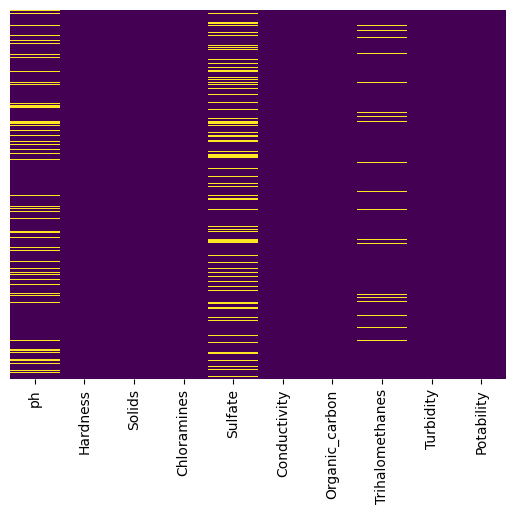

In [ ]:
sns.heatmap(water_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig=px.pie(water_data,names='Potability',hole=0.4,template='plotly_dark')


fig.show()


<Axes: ylabel='Frequency'>

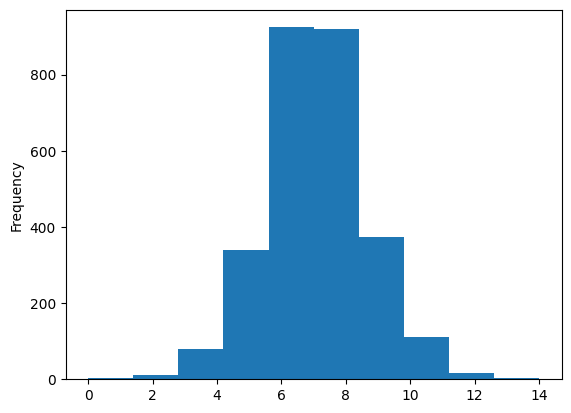

In [ ]:
water_data['ph'].plot(kind='hist')

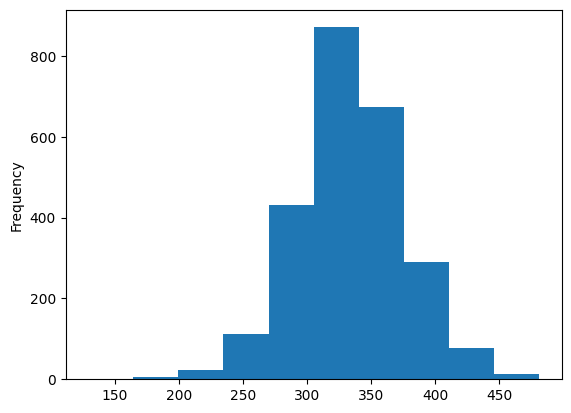

In [ ]:
water_data['Sulfate'].plot(kind='hist')
plt.show()

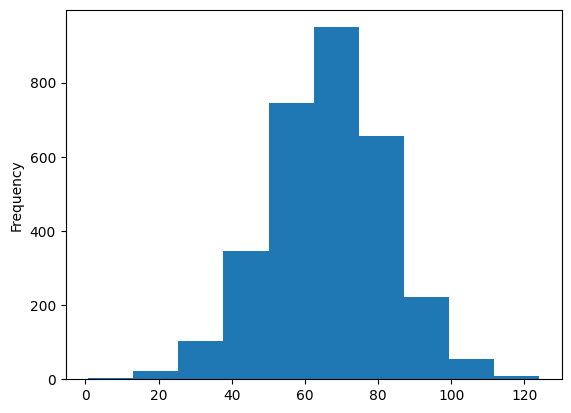

In [ ]:
water_data['Trihalomethanes'].plot(kind='hist')
plt.show()

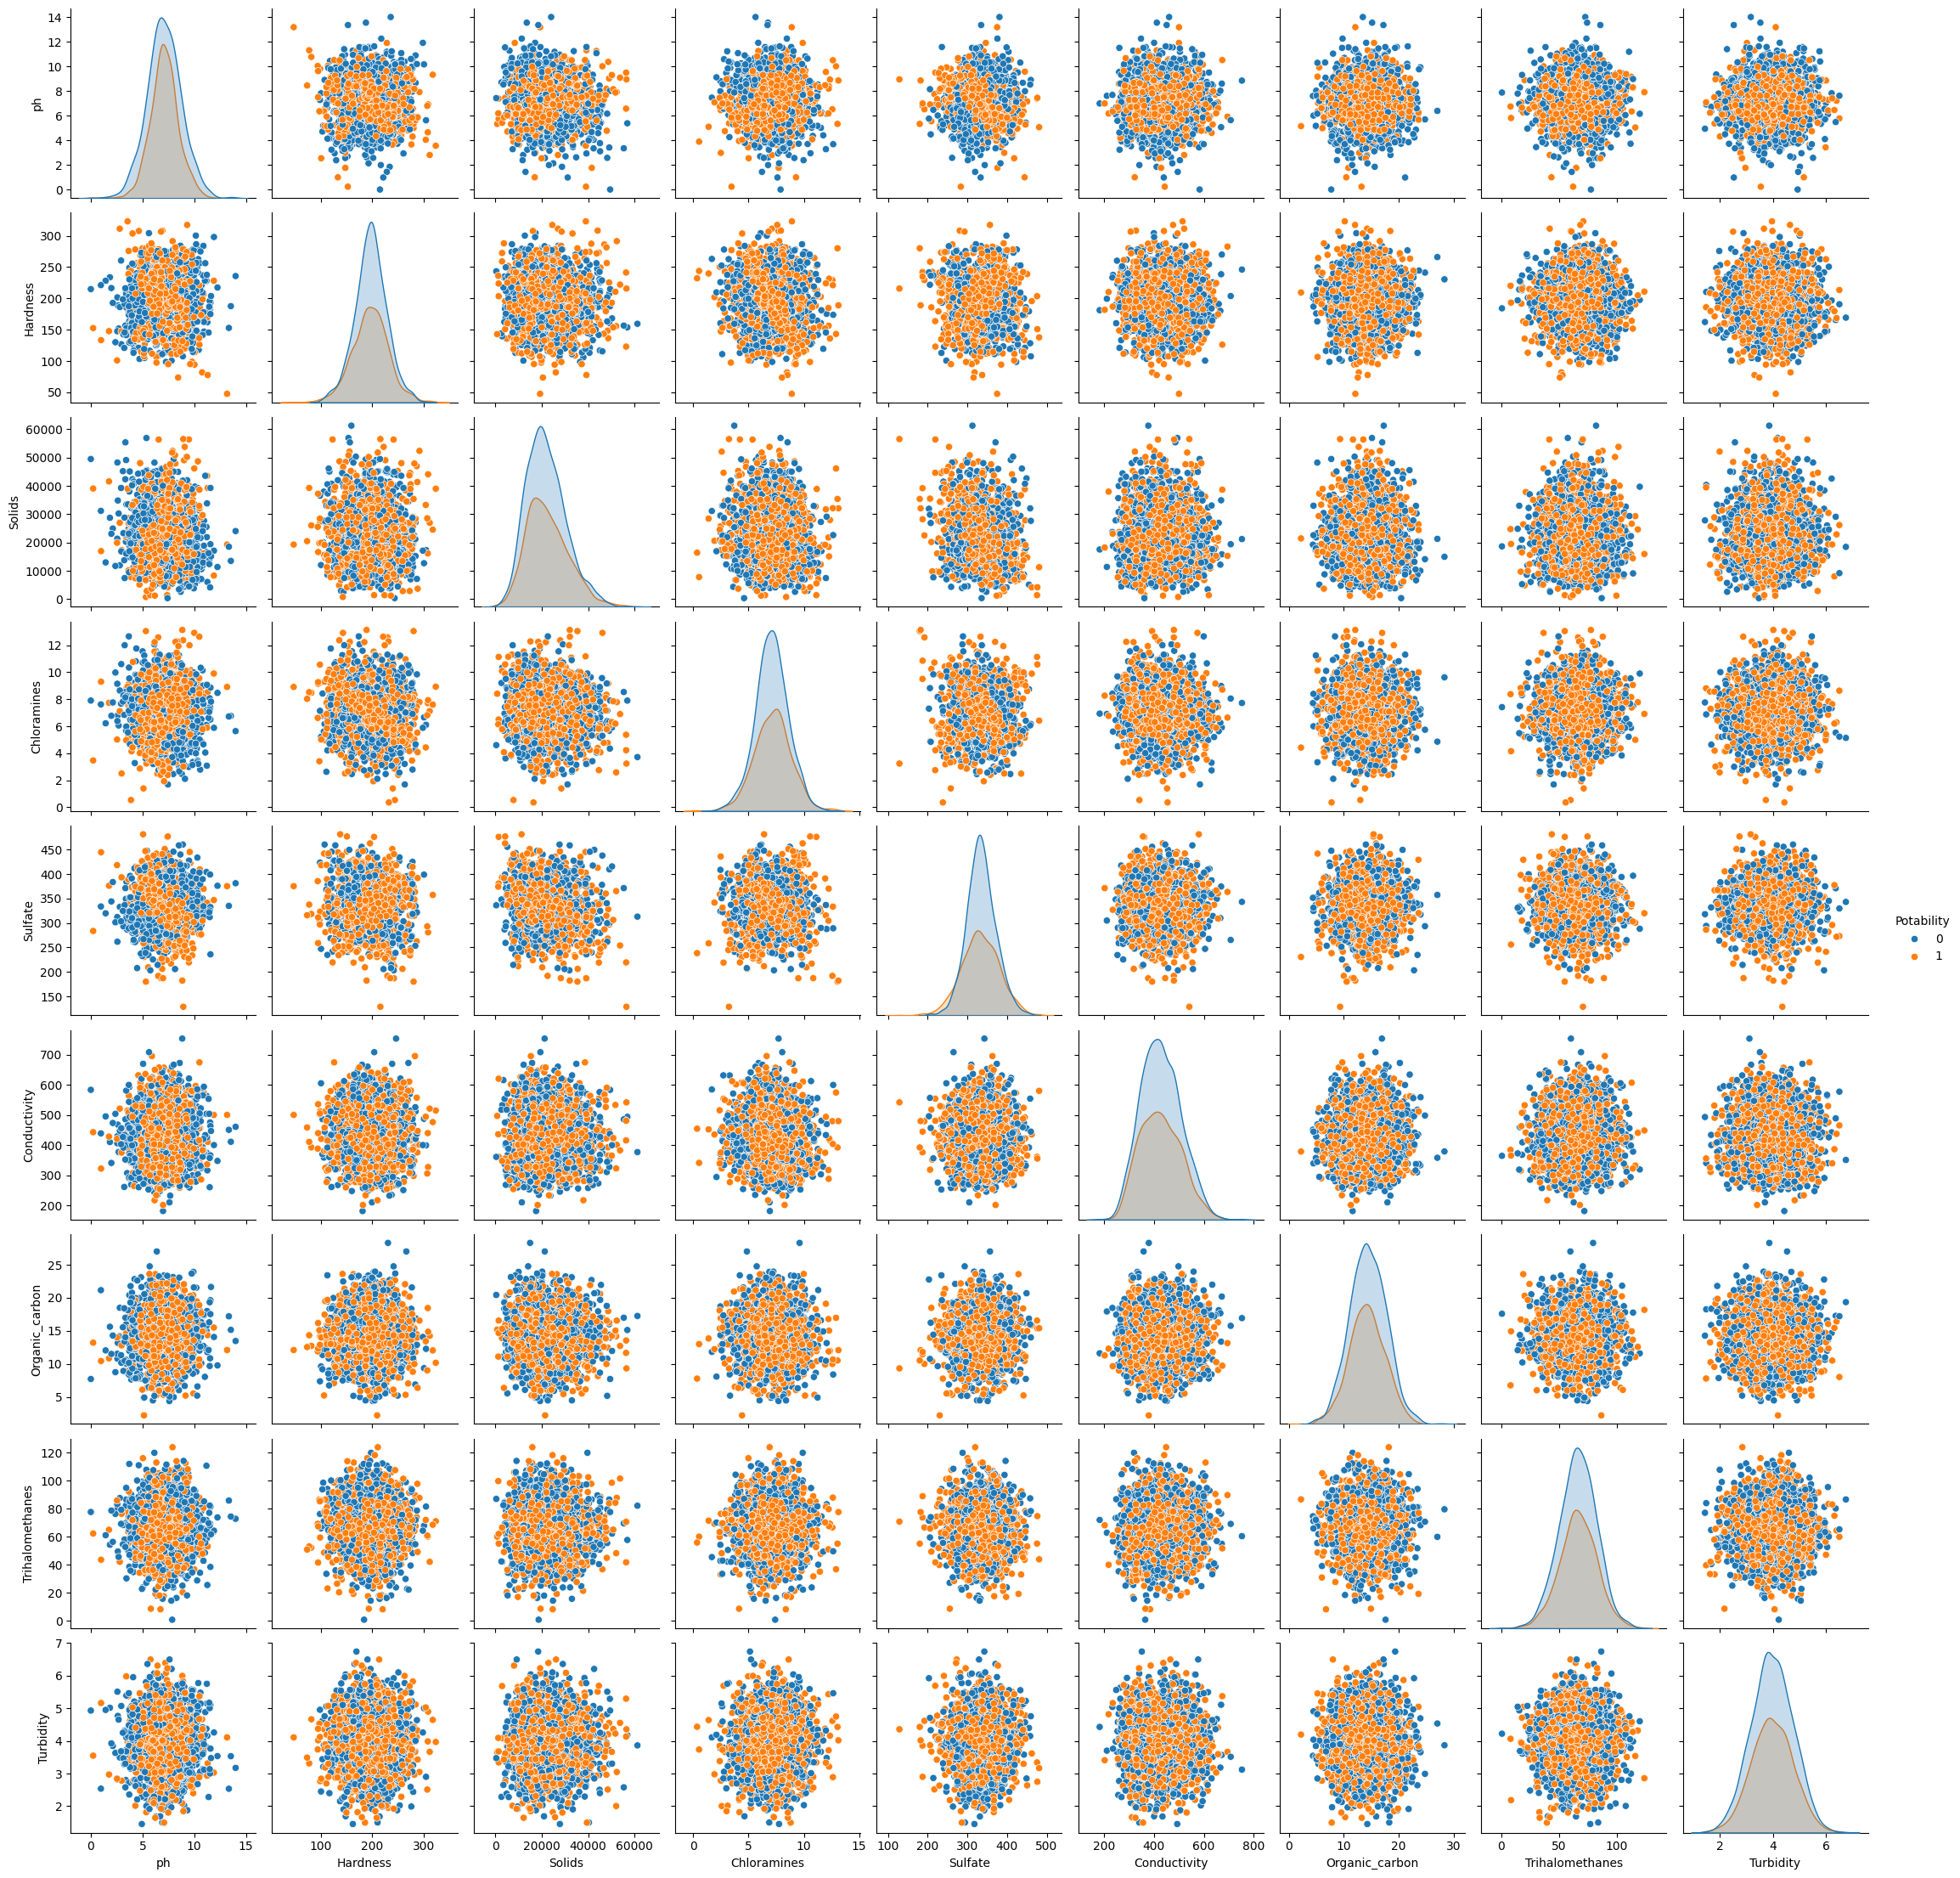

In [ ]:
sns.pairplot(water_data,hue='Potability')

In [ ]:
fig=px.scatter(water_data,x='ph',y='Sulfate',color='Potability',template='plotly_dark')
fig.show()

In [ ]:

water_data['ph']=water_data['ph'].fillna(water_data['ph'].mean())
water_data['Trihalomethanes']=water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())
water_data['Sulfate']=water_data['Sulfate'].fillna(water_data['Sulfate'].mean())

In [ ]:

water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **correlation**

In [ ]:
corr_matrix=water_data.corr()
corr_matrix

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.081561 -0.080619    -0.042512  0.022141   
Hardness         0.081561  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.080619 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.042512 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.022141 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.018123 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.042665  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.010012 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036590 -0.014449  0.019546     0.002363 -0.009790   
Potability       0.002726 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018123        0.042665         0.010012  -0.036590   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                 0.002726  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

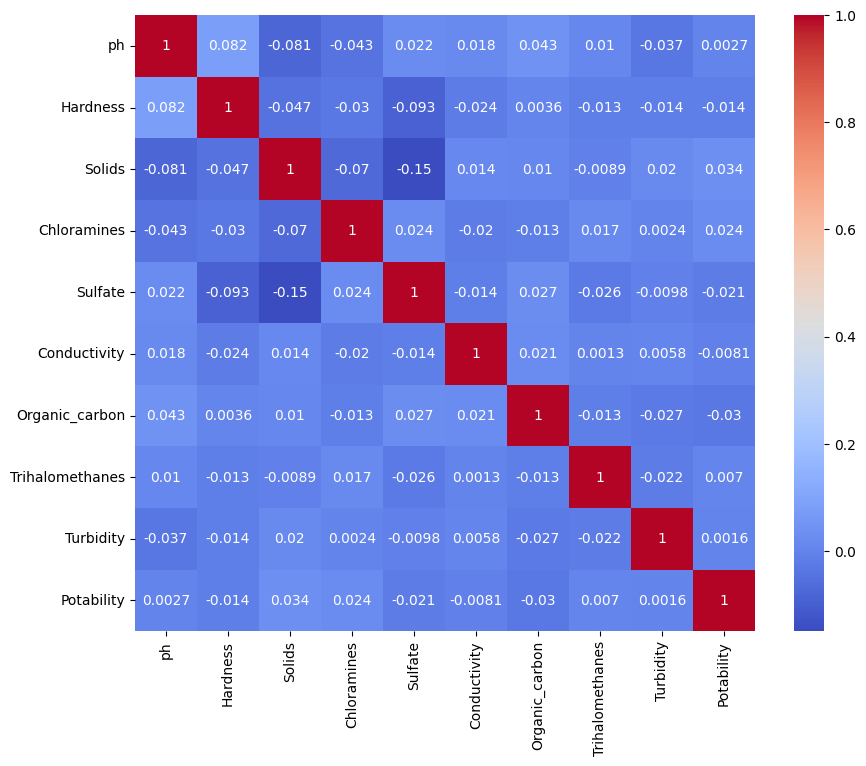

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

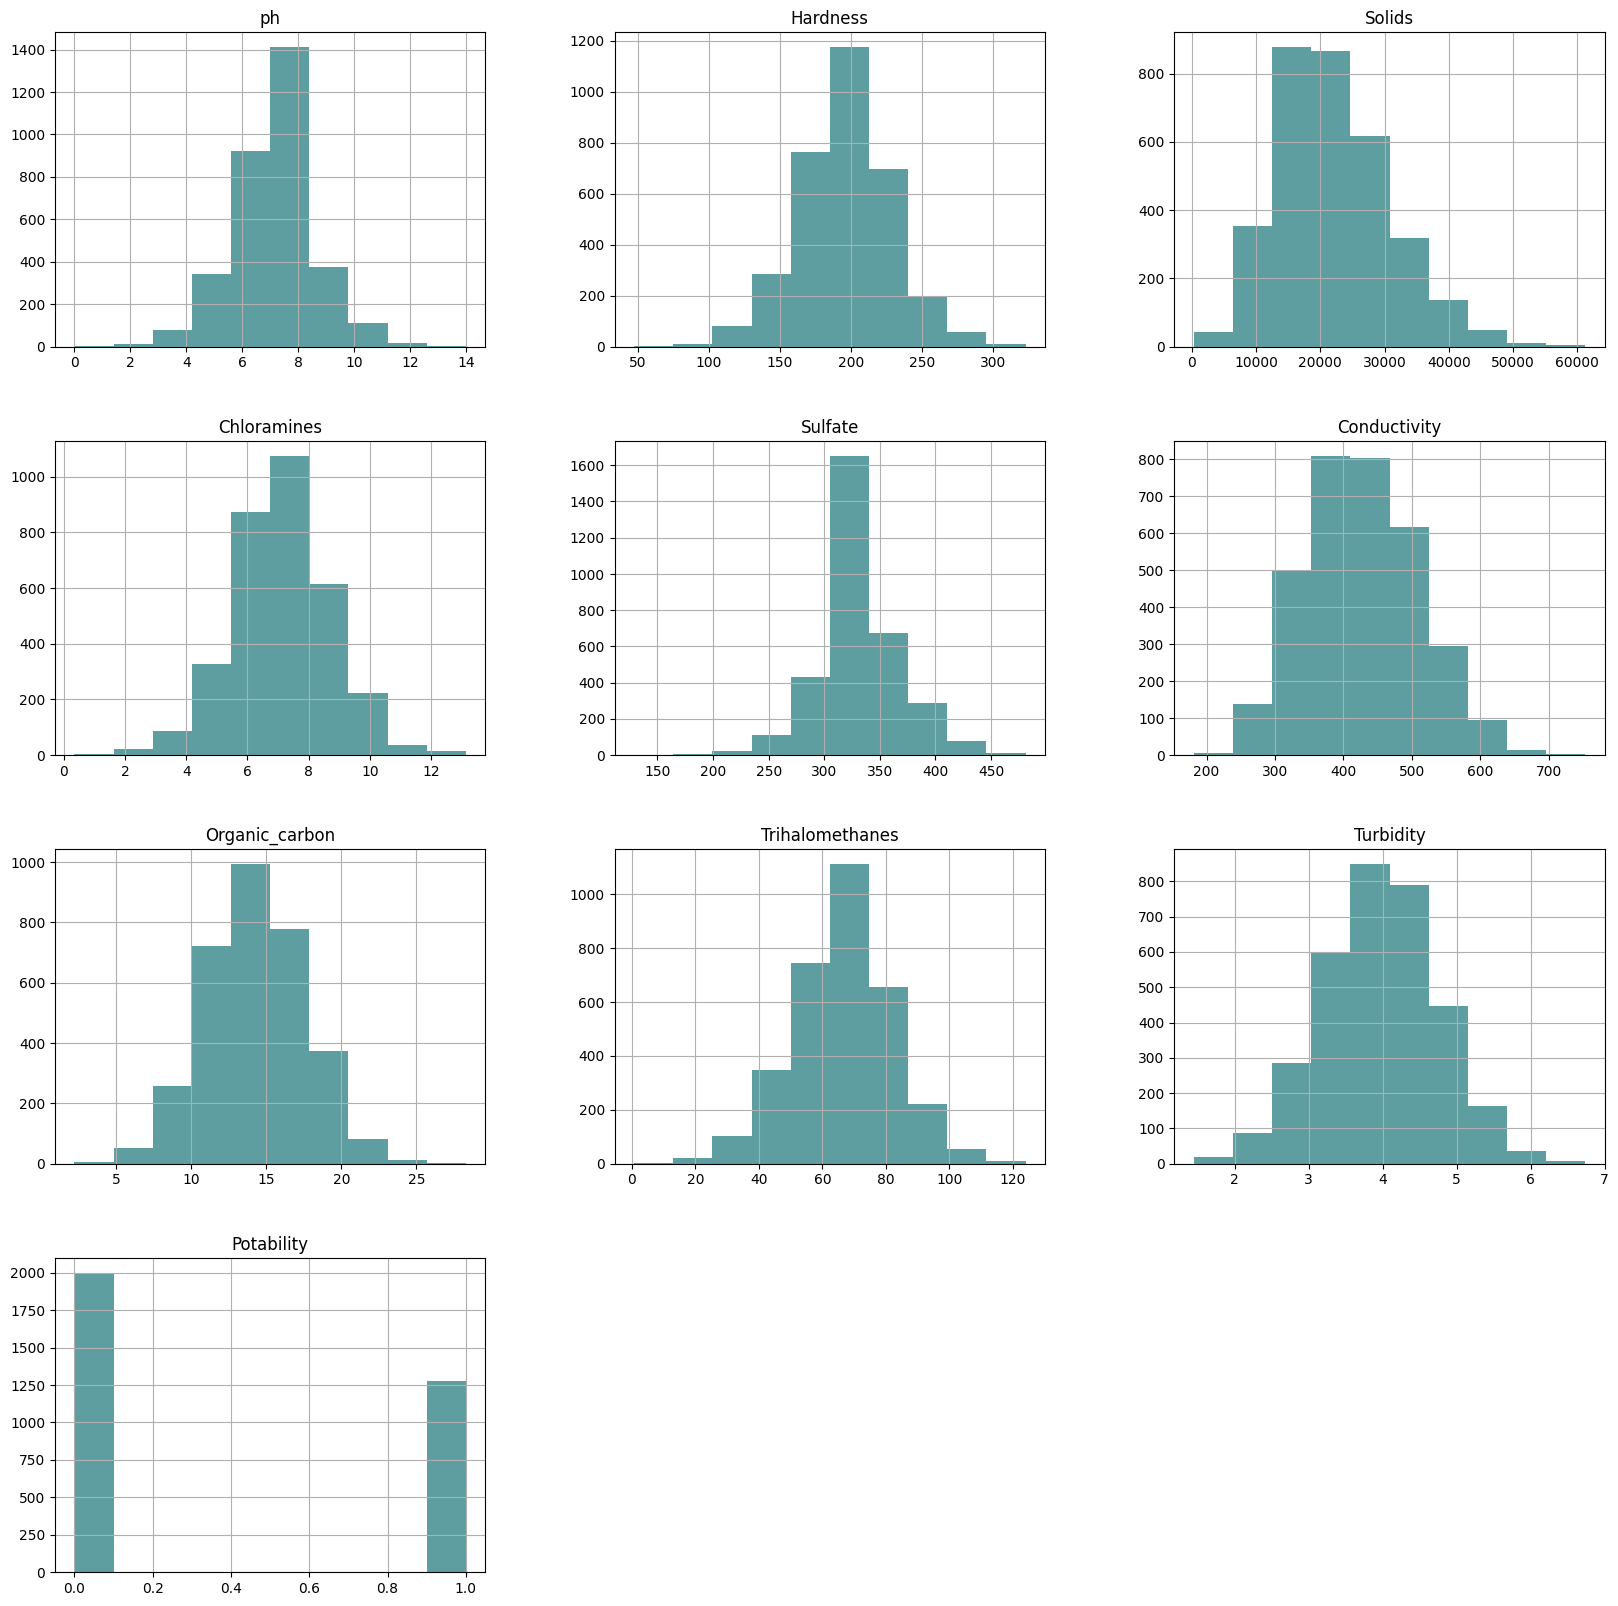

In [ ]:
data_hist_plot=water_data.hist(figsize=(20,20),color="#5F9EA0")

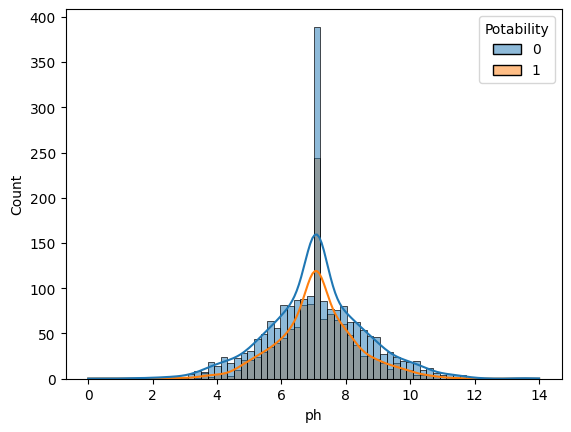

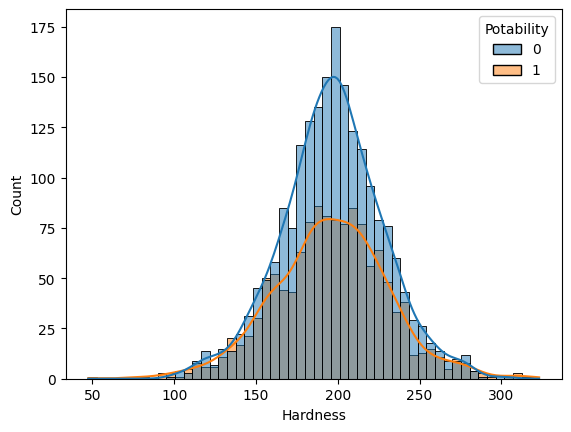

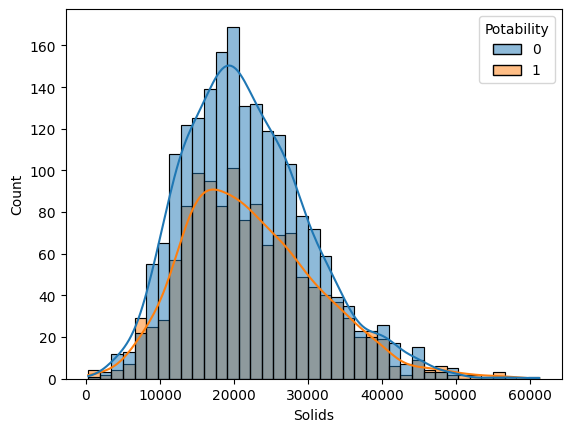

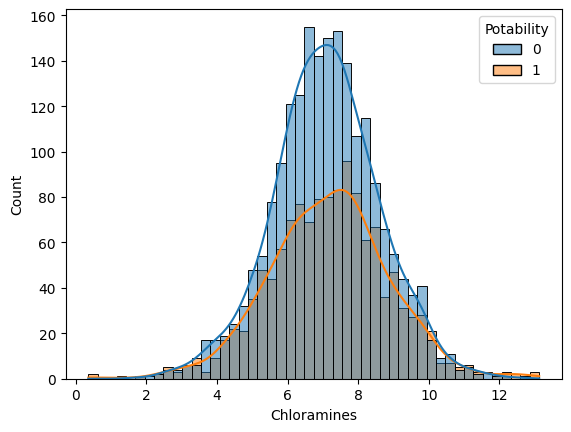

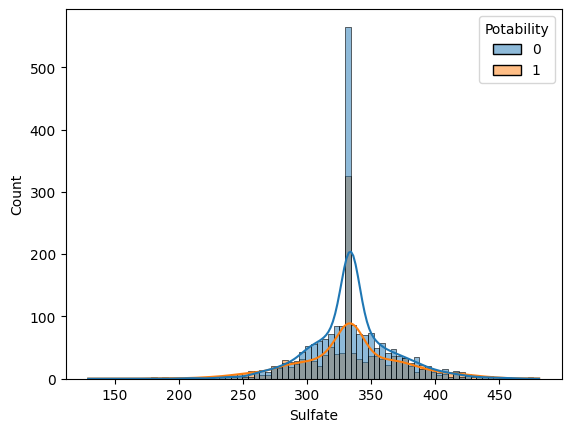

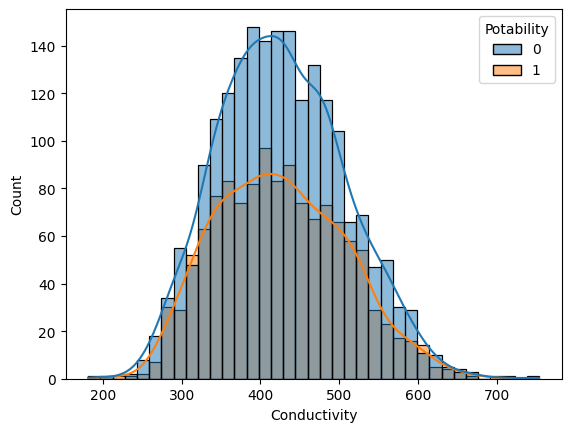

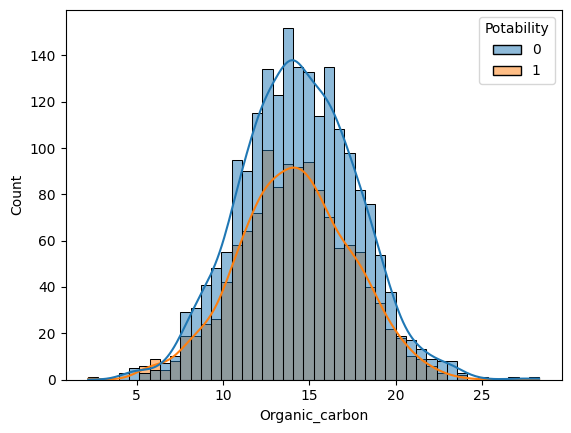

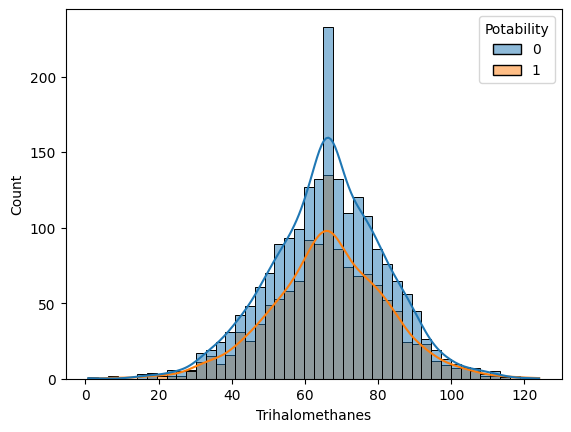

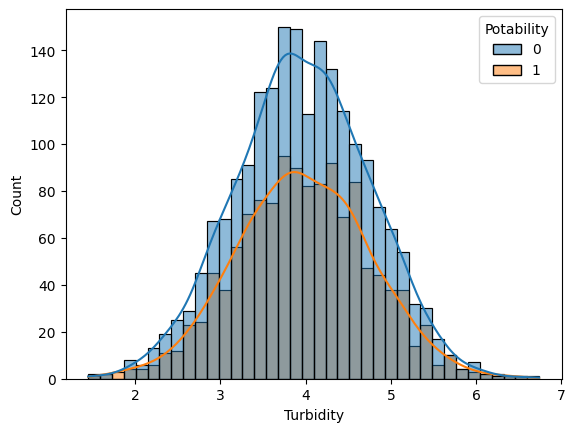

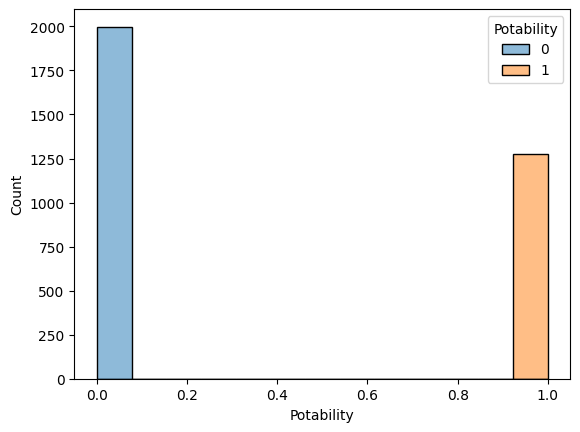

In [ ]:
for col in water_data.columns:
  sns.histplot(data=water_data,x=col,kde=True,hue='Potability')
  plt.show()

In [ ]:
water_data.groupby('Potability').mean().T

Potability                  0             1
ph                   7.086145      7.094233
Hardness           196.733292    195.800744
Solids           21777.490788  22383.991018
Chloramines          7.092175      7.169338
Sulfate            334.371700    332.844122
Conductivity       426.730454    425.383800
Organic_carbon      14.364335     14.160893
Trihalomethanes     66.308522     66.533513
Turbidity            3.965800      3.968328

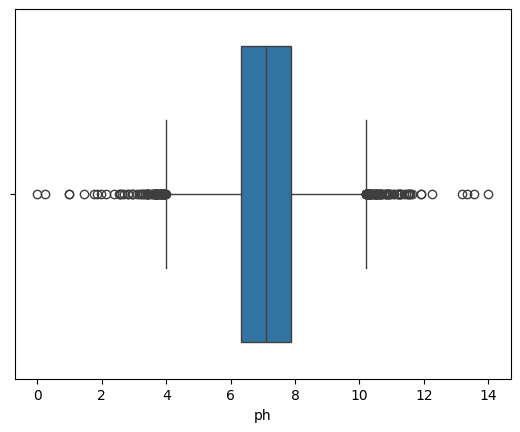

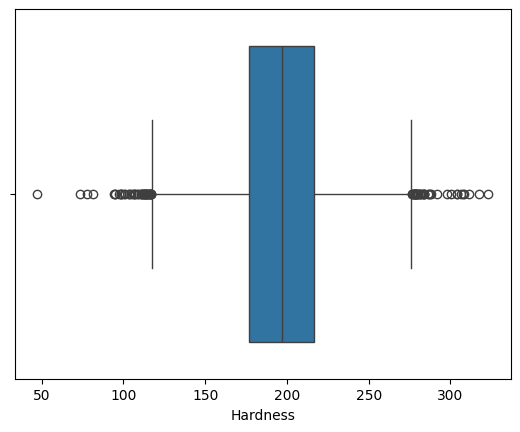

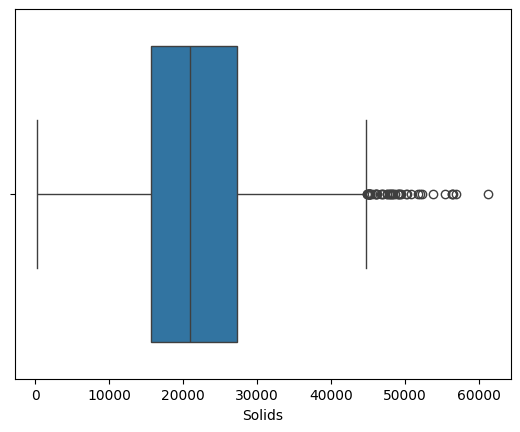

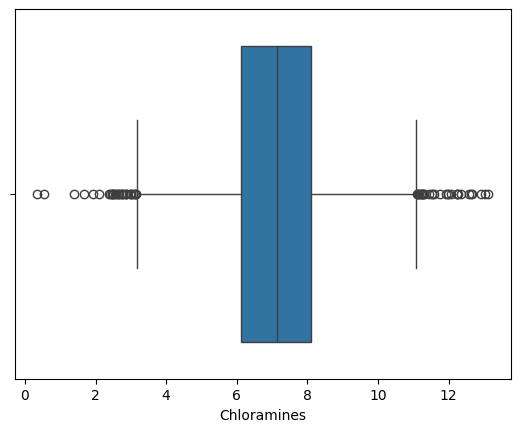

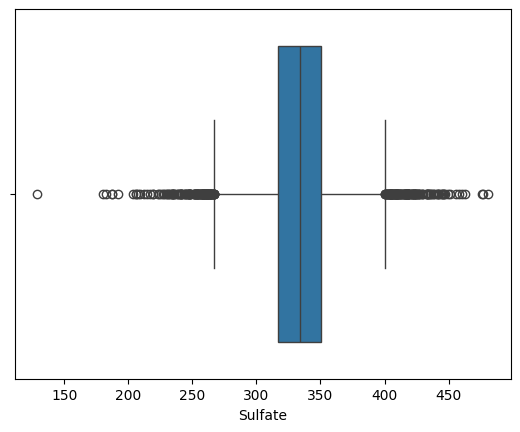

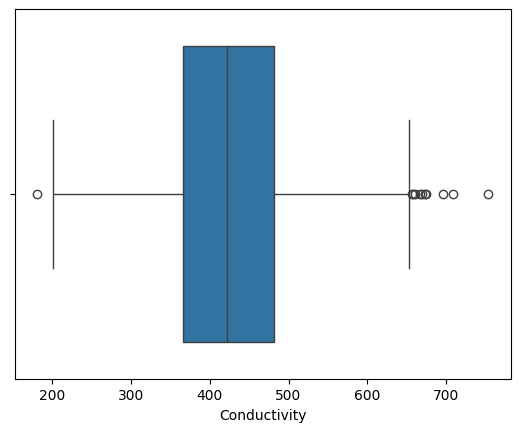

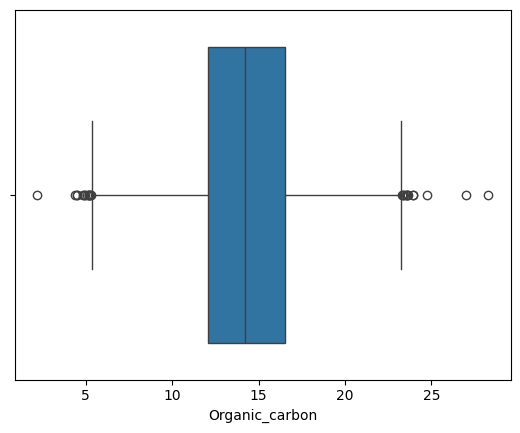

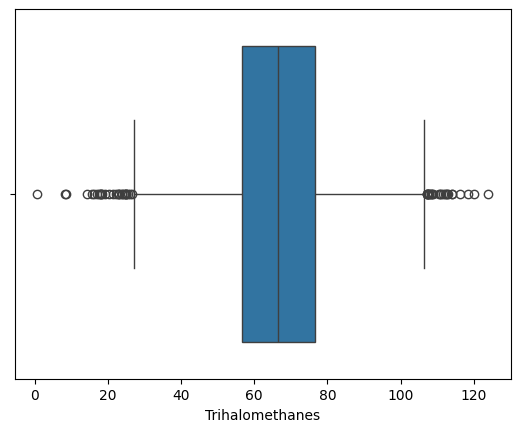

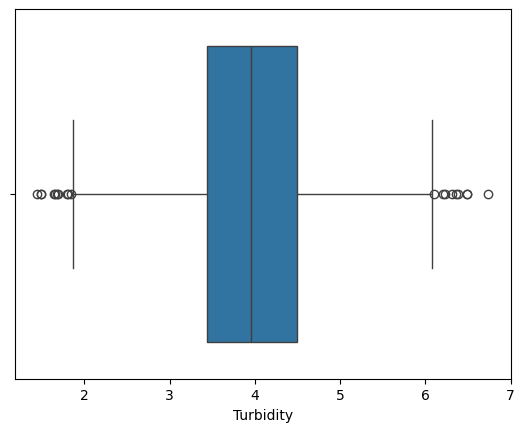

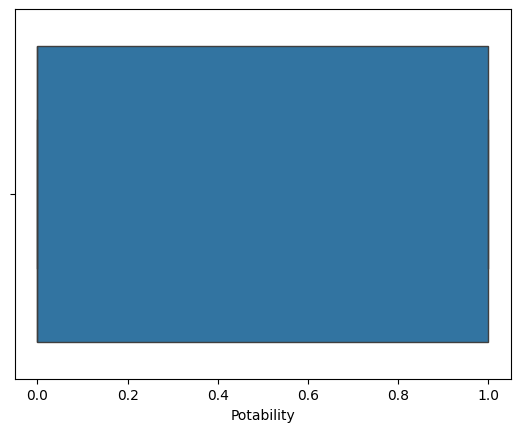

In [ ]:
for col in water_data.columns:
  sns.boxplot(data=water_data,x=col)
  plt.show()

In [ ]:
#sns.countplot(water_data['Potability'])
water_data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<ipython-input-30-efabdcb48eef>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Potability', ylabel='count'>

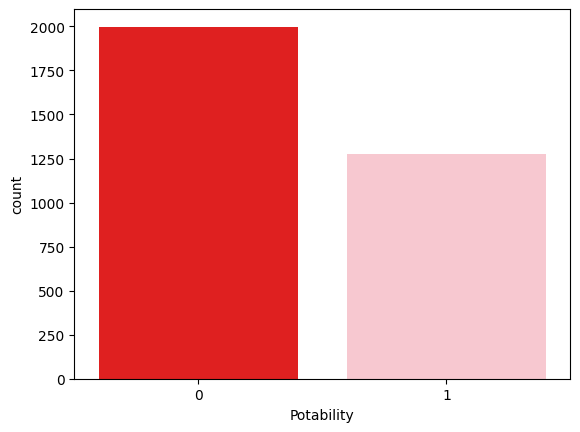

In [ ]:
color=['red','pink']
sns.countplot(x='Potability',data=water_data,palette=color)

In [ ]:
X=water_data.drop('Potability',axis=1)
Y=water_data['Potability']

In [ ]:
X.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.089300  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436525       100.341674   4.628771  
4       11.558279        31.997993   4.075075

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

#**handling imbalanced data**

0----->not potable

1------>potable

In [ ]:
not_potable=water_data[water_data.Potability==0]
potable=water_data[water_data.Potability == 1]
print(not_potable.shape)
print(potable.shape)

(1998, 10)
(1278, 10)


Under-sampling
Here building a sample dataset

containing similar distribution of not_potable and potable

number of potable is ---->1278


In [ ]:
not_potable_sample=not_potable.sample(n=1278)


In [ ]:
print(not_potable_sample.shape)

(1278, 10)


Concatenate the two Dataframe

In [ ]:
new_water_data=pd.concat([not_potable_sample,potable],axis=0)

In [ ]:
new_water_data.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
138    9.562406  202.013643  13041.82914     5.820655  327.118824   
3103   5.967274  187.085084  30846.58547     7.281106  339.063715   
1441  10.301571  199.609364  11278.82968     7.464893  433.448168   
547    7.510943  182.192847  17100.88743     5.948785  357.265732   
900    7.089300  191.348259  14017.37207     6.490700  345.560481   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
138     433.381667       14.139066        63.548993   3.762720           0  
3103    323.962695       12.651854        72.273590   3.914544           0  
1441    461.979286       17.099096        63.190835   3.857852           0  
547     499.095057       20.725806        60.670939   3.342409           0  
900     423.978389       11.863248        65.791687   4.167336           0

In [ ]:
new_water_data.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  7.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  6.419510  175.762646  33155.57822     7.350233  333.775777   
3274  6.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

In [ ]:
new_water_data['Potability'].value_counts()

Potability
0    1278
1    1278
Name: count, dtype: int64

<ipython-input-41-d3d2a5005c31>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Potability', ylabel='count'>

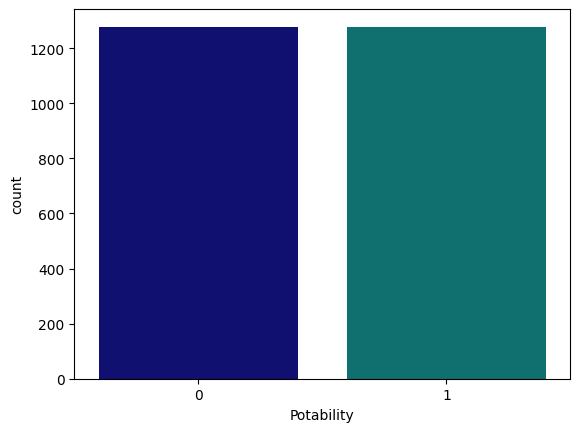

In [ ]:
color=['navy','teal']
sns.countplot(x='Potability',data=new_water_data,palette=color)

# **Feature Scaling:**

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
np.set_printoptions(precision=6, suppress=True)

In [ ]:
X_scaled=std_scaler.fit_transform(X)

X_scaled



array([[-0.      ,  0.259195, -0.139471, ..., -1.180651,  1.306149,
        -1.286298],
       [-2.330754, -2.036414, -0.385987, ...,  0.270597, -0.63848 ,
         0.684218],
       [ 0.697746,  0.847665, -0.240047, ...,  0.781117,  0.001509,
        -1.167365],
       ...,
       [-0.462797, -0.626829,  1.27081 , ..., -0.981329,  0.218748,
        -0.856007],
       [-0.665073,  1.041355, -1.144058, ..., -0.942064,  0.703468,
         0.950797],
       [ 0.542659, -0.038546, -0.525812, ...,  0.56094 ,  0.780223,
        -2.124459]])

# **Training and Testing Dataset:**

In [ ]:
#X_scaled=water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
#Y=water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

#Model Development:
list of models
---------------



1.   DecisionTreeClassifier
3.   RandomForestClassifier
4.   ExtraTreesClassifier
5.   Support Vector Classifier

7.   GradientBoosting
     Classifier

    






**Importing Models**

# **1.Decision Tree classifier**

In [ ]:
#X=water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
#Y=water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(min_samples_split=5)
DT.fit(x_train,y_train)
y_pred_dt=DT.predict(x_test)
DT_acc=DT.score(x_test,y_test)*100

In [ ]:
DT_acc

61.58536585365854

In [ ]:
y_predict_dt=DT.predict(x_test)

In [ ]:
y_test.value_counts()

Potability
0    400
1    256
Name: count, dtype: int64

In [ ]:
y_predict_series=pd.Series(y_predict_dt)
y_predict_series.value_counts()

0    410
1    246
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

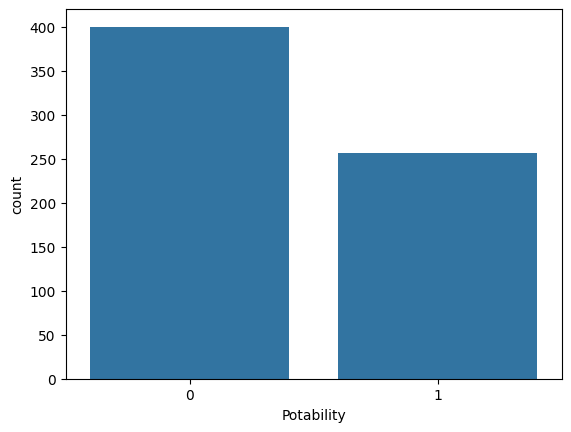

In [ ]:
#histogram of survived test data
import seaborn as sn
sn.countplot(x=y_test)

<Axes: ylabel='count'>

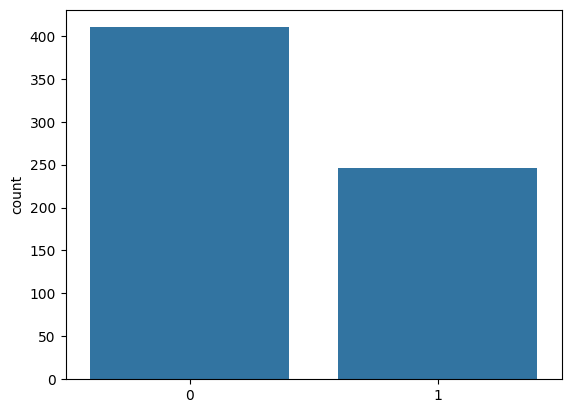

In [ ]:
#histogram of survived (predicted data)
sn.countplot(x=y_predict_dt)

**classification report**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels from your model
true_labels = y_test
predicted_labels = y_pred_dt  # Assuming 'pred_dt' is your model's predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)*100

# Calculate precision
precision = precision_score(true_labels, predicted_labels)* 100

# Calculate recall
recall = recall_score(true_labels, predicted_labels)*100

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 61.58536585365854
Precision: 50.81300813008131
Recall: 48.828125
F1 Score: 0.49800796812749004


**confusion matrix for decision tree**

In [ ]:
# Create confusion matrix
cm4 = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(cm4)

Confusion Matrix:
[[279 121]
 [131 125]]


Text(58.222222222222214, 0.5, 'Actual')

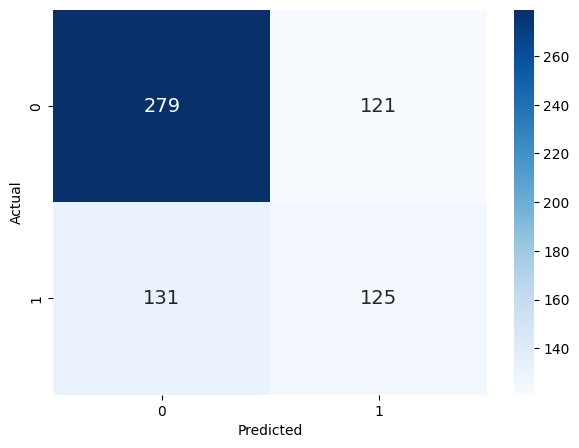

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ROC for decision tree**

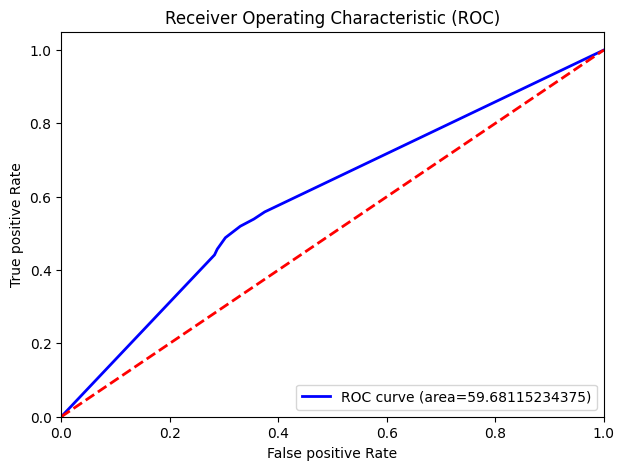

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=DT.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_scores)

roc_auc=auc(fpr,tpr)*100
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Random forest**

In [ ]:
# X=new_water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
# Y=new_water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_scaled,Y,train_size=0.8)

In [ ]:
x_train.shape

(2620, 9)

In [ ]:
x_test.shape

(656, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)
RF_acc=RF.score(x_test,y_test)*100
RF_acc


65.54878048780488

In [ ]:

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Test Accuracy: {test_accuracy:.0f}%")

# Calculate the train accuracy (optional, depending on your needs)
train_accuracy = RF.score(x_train, y_train) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")


Test Accuracy: 66%
Train Accuracy: 100.00%


**classification report**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels from your model
true_labels = y_test
predicted_labels = y_pred_rf  # Assuming 'pred_rf' is your model's predictions

# Calculate accuracy
accuracy_rf = accuracy_score(true_labels, predicted_labels)*100

# Calculate precision
precision = precision_score(true_labels, predicted_labels)*100

# Calculate recall
recall = recall_score(true_labels, predicted_labels)*100

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)*100

# Print the metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 65.54878048780488
Precision: 60.0
Recall: 30.952380952380953
F1 Score: 40.83769633507853


confusion matrix

In [ ]:
# Create confusion matrix
cmj= confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix:")
print(cmj)

Confusion Matrix:
[[352  52]
 [174  78]]


Text(58.222222222222214, 0.5, 'Actual')

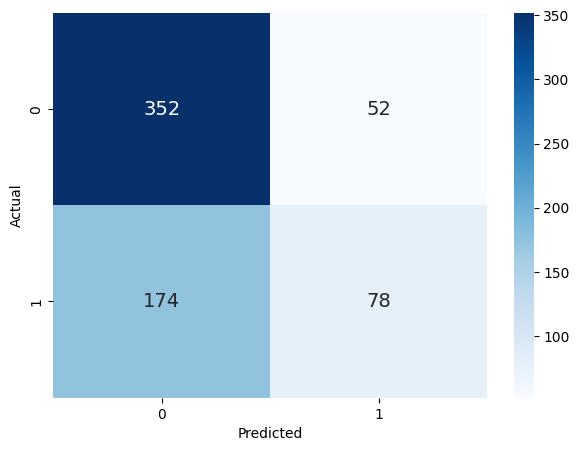

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cmj, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ROC curve for random forest**

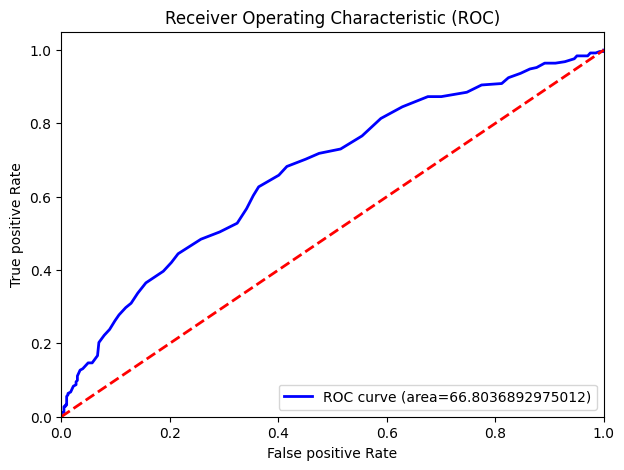

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=RF.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_scores)

roc_auc=auc(fpr,tpr)*100
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **SVM**

In [ ]:
X=new_water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=new_water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
y_pred_svm=SVM.predict(x_test)
SVC_acc=SVM.score(x_test,y_test)*100
SVC_acc

51.5625

In [ ]:

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Calculate the train accuracy (optional, depending on your needs)
train_accuracy = SVM.score(x_train, y_train) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")

Test Accuracy: 51.56%
Train Accuracy: 52.01%


classification report svm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels from your model
true_labels = y_test
predicted_labels = y_pred_svm  # Assuming 'pred_rf' is your model's predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)*100

# Calculate precision
precision = precision_score(true_labels, predicted_labels)*100

# Calculate recall
recall = recall_score(true_labels, predicted_labels)*100

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)*100

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 51.5625
Precision: 54.0
Recall: 21.09375
F1 Score: 30.337078651685395


In [ ]:
# Create confusion matrix
cmsvm= confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:")
print(cmsvm)

Confusion Matrix:
[[210  46]
 [202  54]]


Text(58.222222222222214, 0.5, 'Actual')

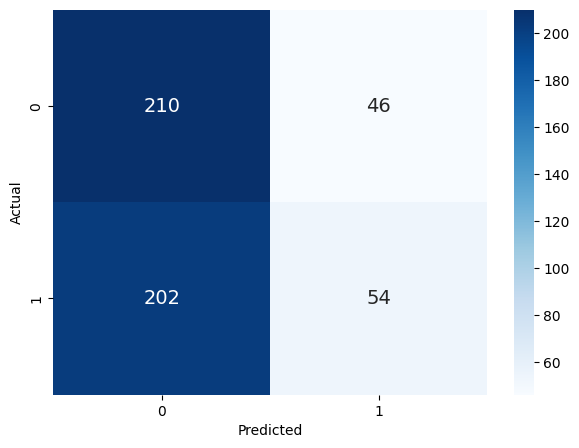

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

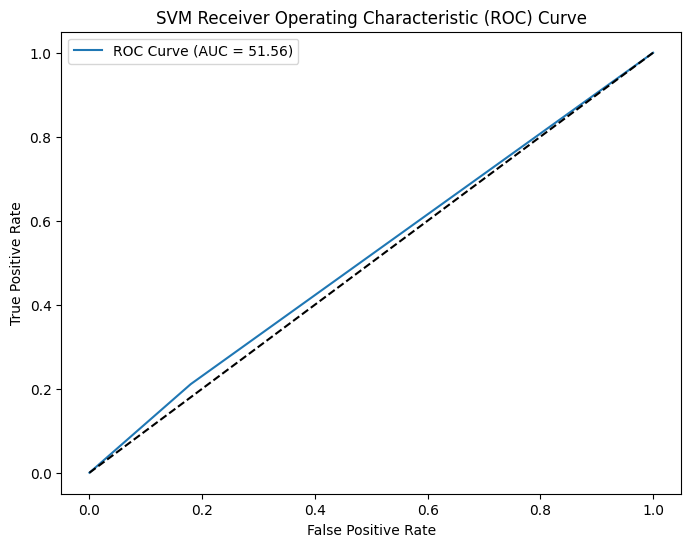

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svm)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test,y_pred_svm)*100

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# **ExtraTreesClassifier**

In [ ]:
X=water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred_etc=ETC.predict(x_test)
etc_acc=ETC.score(x_test,y_test)*100
etc_acc

66.61585365853658

In [ ]:

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_etc) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Calculate the train accuracy (optional, depending on your needs)
train_accuracy = ETC.score(x_train, y_train) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")


Test Accuracy: 66.62%
Train Accuracy: 100.00%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels from your model
true_labels = y_test
predicted_labels = y_pred_etc  # Assuming 'pred_rf' is your model's predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)*100

# Calculate precision
precision = precision_score(true_labels, predicted_labels)*100

# Calculate recall
recall = recall_score(true_labels, predicted_labels)*100

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)*100

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 66.61585365853658
Precision: 71.02803738317756
Recall: 28.78787878787879
F1 Score: 40.97035040431267


In [ ]:
# Create confusion matrix
cmetc = confusion_matrix(y_test,y_pred_etc)
print("Confusion Matrix:")
print(cmetc)

Confusion Matrix:
[[361  31]
 [188  76]]


Text(58.222222222222214, 0.5, 'Actual')

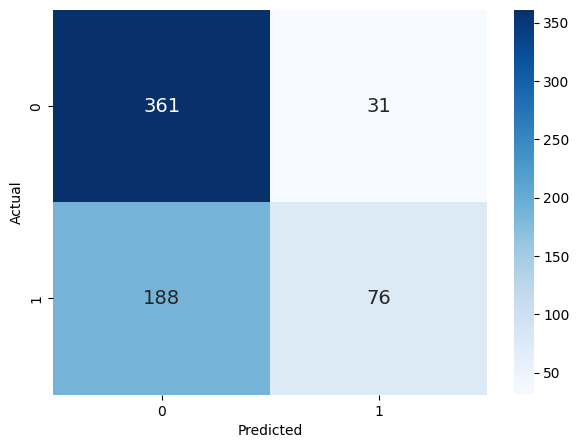

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cmetc, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

ROC curve for Extra tree

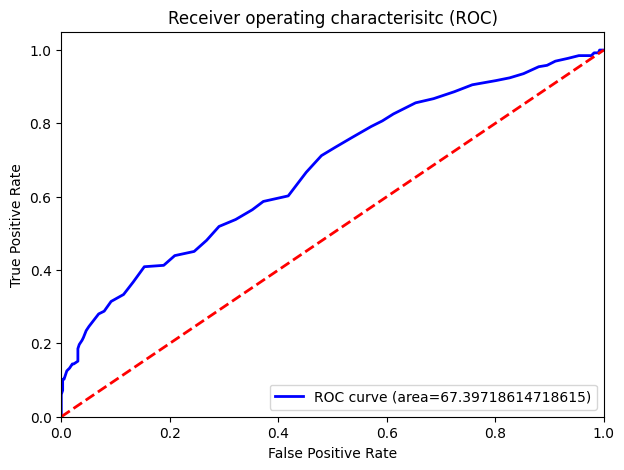

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=ETC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)*100

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterisitc (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Gradient boosting**

In [ ]:
X=water_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=water_data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier()


GBC.fit(x_train,y_train)
y_pred_gbc=GBC.predict(x_test)
gbc_acc=GBC.score(x_test,y_test)*100
gbc_acc

65.2439024390244

In [ ]:

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_gbc) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Calculate the train accuracy (optional, depending on your needs)
train_accuracy = GBC.score(x_train, y_train) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")


Test Accuracy: 65.24%
Train Accuracy: 75.34%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels from your model
true_labels = y_test
predicted_labels = y_pred_gbc

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)*100

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 65.2439024390244
Precision: 0.6146788990825688
Recall: 0.2648221343873518
F1 Score: 0.3701657458563536


In [ ]:
# Create confusion matrix
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
print("Confusion Matrix:")
print(cm_gbc)

Confusion Matrix:
[[361  42]
 [186  67]]


Text(58.222222222222214, 0.5, 'Actual')

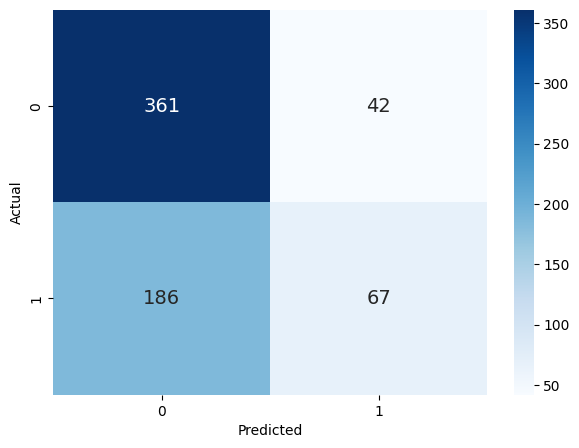

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

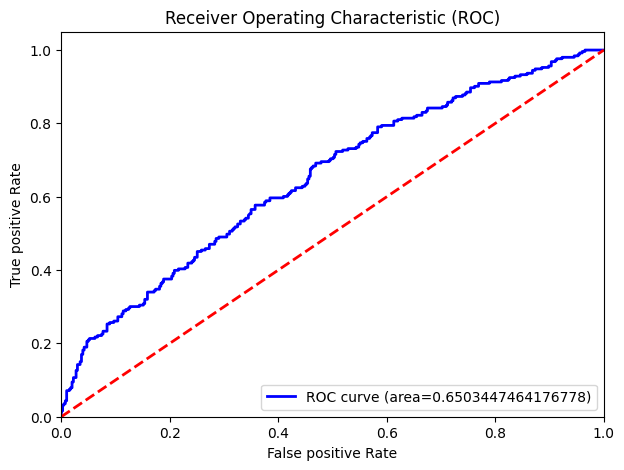

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=GBC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_scores)

roc_auc=auc(fpr,tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**creating the object of the model**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = pd.DataFrame({
    "Models": [
        "Decision Tree",
        "Random Forest",
        "Extra Tree",
        "SVM",
        "gradientBoost"
    ],
    "Accuracy Score": [
        DT_acc,
        RF_acc,
        etc_acc,
        SVC_acc,
        gbc_acc
    ]
})

In [ ]:
models

Models  Accuracy Score
0  Decision Tree       61.585366
1  Random Forest       65.548780
2     Extra Tree       66.615854
3            SVM       51.562500
4  gradientBoost       65.243902

Models  Accuracy Score
2     Extra Tree       66.615854
1  Random Forest       65.548780
4  gradientBoost       65.243902
0  Decision Tree       61.585366
3            SVM       51.562500

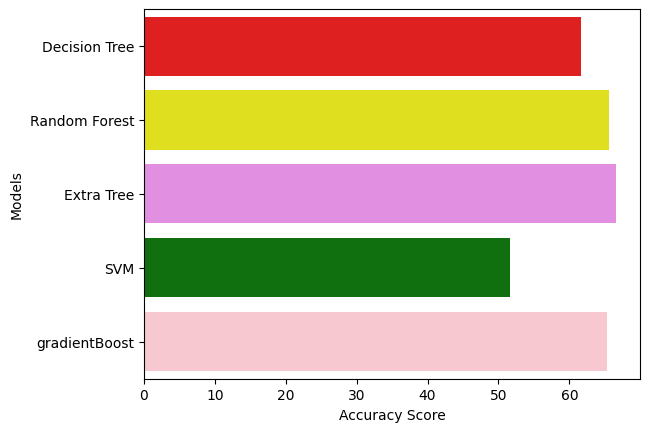

In [ ]:
colors=["Red","Yellow","violet","Green","pink"]
sns.barplot(x="Accuracy Score",y="Models",data=models,hue="Models", palette = colors)
models.sort_values(by="Accuracy Score",ascending=False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
SVM.fit(x_train,y_train)
ETC.fit(x_train,y_train)
RF.fit(x_train,y_train)

y_pred_rf=RF.predict(x_test)
y_pred_svm=SVM.predict(x_test)
y_pred_etc=ETC.predict(x_test)

In [ ]:

# Calculate accuracy using the best model
accuracy_best = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy with Best Model:", accuracy_best,"%")

Accuracy with Best Model: 67.53048780487805 %


In [ ]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.88      0.77       403
           1       0.65      0.34      0.45       253

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



In [ ]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       403
           1       0.61      0.26      0.37       253

    accuracy                           0.65       656
   macro avg       0.64      0.58      0.57       656
weighted avg       0.64      0.65      0.61       656



In [ ]:
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       403
           1       0.68      0.34      0.45       253

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.68      0.65       656



# **confusion matrix**

for random forest

Text(58.222222222222214, 0.5, 'Actual')

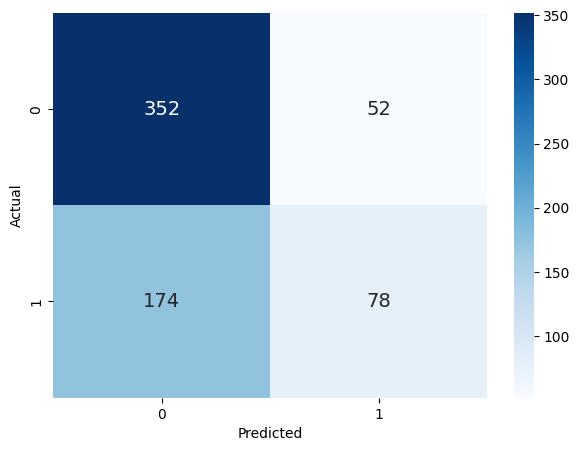

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cmj, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

extra tree confusion matrix

In [ ]:
cm3=confusion_matrix(y_test,y_pred_etc)
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[363  40]
 [168  85]]


Text(58.222222222222214, 0.5, 'Actual')

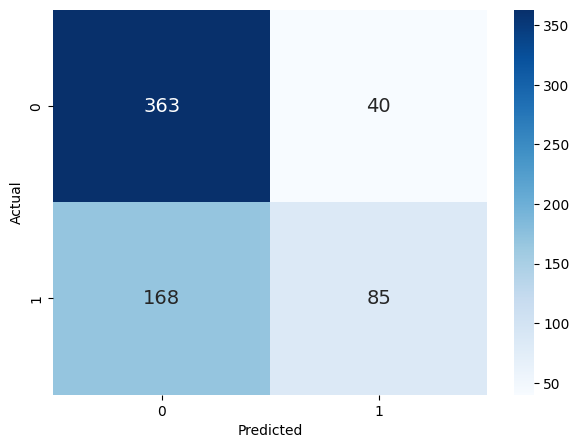

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

#**ROC curve**

**ROC curve for ETC**

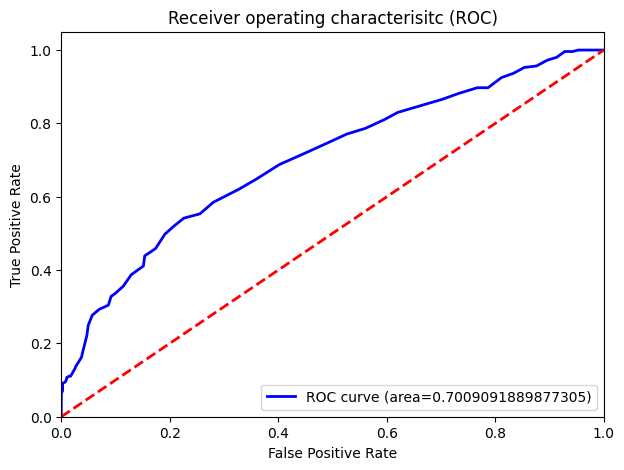

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=ETC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterisitc (ROC)')
plt.legend(loc="lower right")
plt.show()

**Roc curve for Random forest**

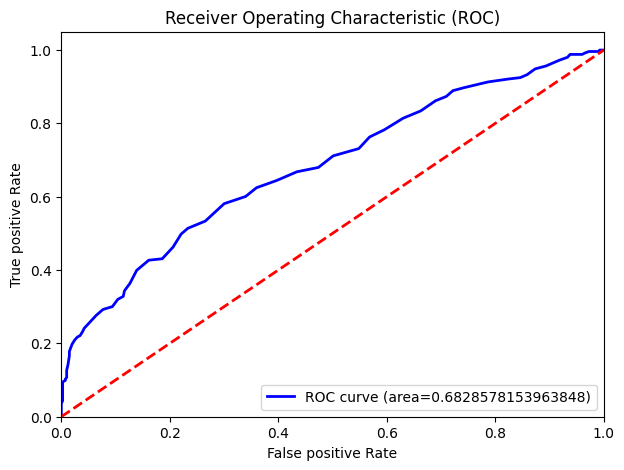

In [ ]:
from sklearn.metrics import roc_curve,auc
y_scores=RF.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,y_scores)

roc_auc=auc(fpr,tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (area={roc_auc})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **cross validation**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# List of models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("SVM", SVC(probability=True)),
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Initialize result storage
results = {
    "Model": [],
    "Hold-out Accuracy": [],
    "Cross-Validation Accuracy": [],
    "Cross-Validation Std": []
}

# Iterate through models
for name, model in models:
    # Fit the model
    model.fit(x_train, y_train)

    # Hold-out validation
    y_pred = model.predict(x_test)
    hold_out_accuracy = accuracy_score(y_test, y_pred)

    # K-Fold Cross-validation
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_accuracies = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
    cv_mean = cv_accuracies.mean()
    cv_std = cv_accuracies.std()

    # Store results
    results["Model"].append(name)
    results["Hold-out Accuracy"].append(hold_out_accuracy)
    results["Cross-Validation Accuracy"].append(cv_mean)
    results["Cross-Validation Std"].append(cv_std)

    # Print detailed metrics for the hold-out set
    print(f"--- {name} ---")
    print(f"Hold-out Accuracy: {hold_out_accuracy:.2f}")
    print(f"k fold Cross-Validation Mean Accuracy: {cv_mean:.2f}")
    print(f"Cross-Validation Std: {cv_std:.2f}")
    print("")



#HYPER PARAMETER TUNING  
BEST MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF={"min_samples_split":[2,6],
           "min_samples_leaf":[1,4],
           "n_estimators":[100,200,300],
           "criterion":["gini",'entropy']
           }

cv_method=StratifiedKFold(n_splits=3)
GridSearchCV_RF=GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=params_RF,
                             cv=cv_method,
                             verbose=1,n_jobs=2,scoring="accuracy",
                             return_train_score=True)
GridSearchCV_RF.fit(x_train,y_train)
best_params_RF=GridSearchCV_RF.best_params_
print("Best Hyperparameters for RandomForest are =",best_params_RF)


In [ ]:
best_estimators=GridSearchCV_RF.best_estimator_
best_estimators

In [ ]:
best_estimators=GridSearchCV_RF.best_estimator_
best_estimators.fit(x_train,y_train)
y_pred_best=best_estimators.predict(x_test)
print(classification_report(y_test,y_pred_best))

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random forest Model ={round(accuracy_score(y_test,y_pred_best)*100,2)}%")

HYPER PARAMETER TUNING FOR EXTRA TREE

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

params_ET = {
    "min_samples_split": [2, 6],
    "min_samples_leaf": [1, 4],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", 'entropy']
}

cv_method = StratifiedKFold(n_splits=3)

GridSearchCV_ET = GridSearchCV(
    estimator=ExtraTreesClassifier(),
    param_grid=params_ET,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring="accuracy",
    return_train_score=True
)

GridSearchCV_ET.fit(x_train, y_train)

best_params_ET = GridSearchCV_ET.best_params_
print("Best Hyperparameters for ExtraTrees are =", best_params_ET)

best_estimator = GridSearchCV_ET.best_estimator_
best_estimator.fit(x_train, y_train)

y_predd_best = best_estimator.predict(x_test)

print(classification_report(y_test, y_predd_best))


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Extra tree Model ={round(accuracy_score(y_test,y_predd_best)*100,2)}%")

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Assuming x_train, x_test, y_train, y_test are already defined
# Split the data
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to evaluate a model
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, report

# Default models
rf_default = RandomForestClassifier(random_state=42)
et_default = ExtraTreesClassifier(random_state=42)

# Evaluate default models
accuracy_rf_before, report_rf_before = evaluate_model(rf_default, x_train, y_train, x_test, y_test)
accuracy_et_before, report_et_before = evaluate_model(et_default, x_train, y_train, x_test, y_test)

# Hyperparameter tuning for Random Forest
params_RF = {
    "min_samples_split": [2, 6],
    "min_samples_leaf": [1, 4],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", 'entropy']
}

cv_method = StratifiedKFold(n_splits=3)

RandomizedSearchCV_RF = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=params_RF,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring="accuracy",
    return_train_score=True
)

RandomizedSearchCV_RF.fit(x_train, y_train)
best_rf = RandomizedSearchCV_RF.best_estimator_

# Hyperparameter tuning for Extra Trees
params_ET = {
    "min_samples_split": [2, 6],
    "min_samples_leaf": [1, 4],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", 'entropy']
}

GridSearchCV_ET = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_grid=params_ET,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring="accuracy",
    return_train_score=True
)

GridSearchCV_ET.fit(x_train, y_train)
best_et = GridSearchCV_ET.best_estimator_

# Evaluate tuned models
accuracy_rf_after, report_rf_after = evaluate_model(best_rf, x_train, y_train, x_test, y_test)
accuracy_et_after, report_et_after = evaluate_model(best_et, x_train, y_train, x_test, y_test)

# Prepare the results table
results = {
    "Model": ["Random Forest", "Extra Trees"],
    "Accuracy Before": [accuracy_rf_before, accuracy_et_before],
    "Accuracy After": [accuracy_rf_after, accuracy_et_after],
    "Precision (0)": [report_rf_after['0']['precision'], report_et_after['0']['precision']],
    "Recall (0)": [report_rf_after['0']['recall'], report_et_after['0']['recall']],
    "Precision (1)": [report_rf_after['1']['precision'], report_et_after['1']['precision']],
    "Recall (1)": [report_rf_after['1']['recall'], report_et_after['1']['recall']],
    "F1 Score": [report_rf_after['weighted avg']['f1-score'], report_et_after['weighted avg']['f1-score']]
}

results_df = pd.DataFrame(results)
print(results_df)

# Display the results table
print("Model Performance Comparison:")
print(results_df.to_string(index=False))


#prediction

In [ ]:
water_data.columns

In [ ]:
list1=water_data.iloc[3:4,0:9].values.flatten().tolist()
list1

Saving trained model

In [ ]:
import pickle

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import pickle

# Assuming X_train and y_train are your training data
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

# Save the trained model to a file using pickle
with open('water_model_rf(1).pk1', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Load the saved model from the file
with open('water_model_rf(1).pk1', 'rb') as file:
    water_models_rf = pickle.load(file)


In [ ]:
#filename='water_model.sav'

In [ ]:
#pickle.dump(model_prediction,open(file,'wb'))

In [ ]:
input_data = (8.316,214.34,22018, 8,356.88,363.26,18.43,100.34,4.62)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_estimator.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The water not potable')
else:
  print('The water is potable')

#deployment

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

In [ ]:
from fastapi import FastAPI, Form, HTTPException
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import pickle
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import pandas as pd

# Define the FastAPI app
nest_asyncio.apply()
app = FastAPI()

# Load the trained model for water potability prediction
try:
    with open("/content/water_model_rf(1).pk1", "rb") as f:
        model = pickle.load(f)
except Exception as e:
    model = None
    print(f"Error loading model: {e}")

# Define the input data model
class InputData(BaseModel):
    ph: float
    Hardness: float
    Solids: float
    Chloramines: float
    Sulfate: float
    Conductivity: float
    Organic_carbon: float
    Trihalomethanes: float
    Turbidity: float

# Define the HTML content for the prediction form
html_content = """

       <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Water Potability Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            display: flex;
            height: 100vh;
            background-image: radial-gradient( circle 685.3px at 47.8% 55.1%,  rgba(255,99,152,1) 0%, rgba(251,213,149,1) 90.1% );
        }
        .container {
            margin: auto;
            width: 50%;
            display: flex;
            justify-content: center;
            align-items: center;
        }
        .form-container {
             background-color: #0093E9;
background-image: linear-gradient(160deg, #0093E9 0%, #80D0C7 100%);

            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
            width: 100%;
        }
        h1 {
            text-align: center;
            color: #333;
        }
        .form-grid {
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 15px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            color: #333;
        }
        input[type="number"] {
            width: 100%;
            padding: 10px;
            border: 4px solid #ccc;
            border-radius: 4px;
            box-sizing: border-box;
        }
        button {
            width: 100%;
            padding: 15px;
            background-color: pink;
            color: white;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
            margin-top: 15px;
        }
        button:hover {
            background-color: #45a049;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="form-container">
            <h1>Water Potability Prediction</h1>
            <form id="predictionForm" action="/water_prediction" method="post">
                <div class="form-grid">
                    <div>
                        <label for="ph">PH:</label>
                        <input type="number" id="ph" name="ph" step="any" required>
                    </div>
                    <div>
                        <label for="Hardness">Hardness:</label>
                        <input type="number" id="Hardness" name="Hardness" step="any" required>
                    </div>
                    <div>
                        <label for="Solids">Solids:</label>
                        <input type="number" id="Solids" name="Solids" step="any" required>
                    </div>
                    <div>
                        <label for="Chloramines">Chloramines:</label>
                        <input type="number" id="Chloramines" name="Chloramines" step="any" required>
                    </div>
                    <div>
                        <label for="Sulfate">Sulfate:</label>
                        <input type="number" id="Sulfate" name="Sulfate" step="any" required>
                    </div>
                    <div>
                        <label for="Conductivity">Conductivity:</label>
                        <input type="number" id="Conductivity" name="Conductivity" step="any" required>
                    </div>
                    <div>
                        <label for="Organic_carbon">Organic Carbon:</label>
                        <input type="number" id="Organic_carbon" name="Organic_carbon" step="any" required>
                    </div>
                    <div>
                        <label for="Trihalomethanes">Trihalomethanes:</label>
                        <input type="number" id="Trihalomethanes" name="Trihalomethanes" step="any" required>
                    </div>
                    <div>
                        <label for="Turbidity">Turbidity:</label>
                        <input type="number" id="Turbidity" name="Turbidity" step="any" required>
                    </div>
                </div>
                <button type="submit">Predict</button>
            </form>
        </div>
    </div>
</body>
</html>


"""

# Define the prediction route for water potability
@app.post("/water_prediction")
async def predict(
    ph: float = Form(["ph"]),
    Hardness: float = Form(["Hardness"]),
    Solids: float = Form(["Solids"]),
    Chloramines: float = Form(["Chloramines"]),
    Sulfate: float = Form(["Sulfate"]),
    Conductivity: float = Form(["Conductivity"]),
    Organic_carbon: float = Form(["Organic_carbon"]),
    Trihalomethanes: float = Form(["Trihalomethanes"]),
    Turbidity: float = Form(["Turbidity"])
):
    # Create the input data as a dictionary
    input_data = {
        "ph": ph,
        "Hardness": Hardness,
        "Solids": Solids,
        "Chloramines": Chloramines,
        "Sulfate": Sulfate,
        "Conductivity": Conductivity,
        "Organic_carbon": Organic_carbon,
        "Trihalomethanes": Trihalomethanes,
        "Turbidity": Turbidity
    }

    # Convert the input data to a DataFrame
    input_data_df = pd.DataFrame([input_data])

    # Make prediction
    prediction = model.predict(input_data_df)[0]  # Assuming model is already loaded and trained

    # Define the output message based on prediction
    output_message = "Not potable" if prediction == 0 else "Potable"

    return HTMLResponse(content=f"<h1>{output_message}</h1>", status_code=200)

# Define the index route to serve the HTML form
@app.get("/", response_class=HTMLResponse)
async def index():
    return html_content

# Authenticate ngrok with your token
ngrok.set_auth_token("2g7AO7kN4uIuhdw5JUpG1oEtiSm_6Zf2DieyS7gxwqrYQEAAw")

# Run ngrok to tunnel the FastAPI app to the internet
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)

# Run the FastAPI app using uvicorn
if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)
